In [1]:
# import toolkit
# import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd

In [101]:
# import sentimental data
amazon_df = pd.read_csv('amazon_df.csv')
gme_df = pd.read_csv('gme_df.csv')
kodak_df = pd.read_csv('kodak_df.csv')
facebook_df = pd.read_csv('fb_df.csv')

In [102]:
# renaming columns
amazon_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
gme_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
kodak_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
facebook_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)

# dropping columns

amazon_df.drop(columns=['Unnamed: 0'], inplace=True)
gme_df.drop(columns=['Unnamed: 0'], inplace=True)
kodak_df.drop(columns=['Unnamed: 0'], inplace=True)
facebook_df.drop(columns=['Unnamed: 0'], inplace=True)


In [103]:
# import price data
amazon_price_df = pd.read_csv('price/AMZN_1.csv')
gme_price_df = pd.read_csv('price/GME_1.csv')
kodak_price_df = pd.read_csv('price/KODK_1.csv')
facebook_price_df = pd.read_csv('price/FB_1.csv')

In [44]:
amazon_df

,Date,Positive,Neutral,Negative,Sentimental Score
0,2021-07-15,6,5,3,0.679
1,2021-07-14,4,0,3,0.214
2,2021-07-13,7,2,5,0.357
3,2021-07-12,4,1,5,-0.050
4,2021-07-11,1,0,4,-0.900
...,...,...,...,...,...
763,2019-04-05,7,2,1,1.100
764,2019-04-04,10,3,1,1.179
765,2019-04-03,9,4,3,0.813
766,2019-04-02,9,3,1,1.154


In [104]:
# merging DB

amazon_df = pd.merge(amazon_df, amazon_price_df, how="outer", on=["Date", "Date"])
gme_df = pd.merge(gme_df, gme_price_df, how="outer", on=["Date", "Date"] )
kodak_df = pd.merge(kodak_df, kodak_price_df, how="outer", on=["Date", "Date"] )
facebook_df = pd.merge(facebook_df, facebook_price_df, how="outer", on=["Date", "Date"] )


print(amazon_df.shape)
print(kodak_df.shape)
print(gme_df.shape)
print(facebook_df.shape)

(862, 11)
(653, 11)
(726, 11)
(855, 11)


In [105]:
facebook_df.drop(columns=['Date'],inplace=True)
kodak_df.drop(columns=['Date'],inplace=True)
gme_df.drop(columns=['Date'],inplace=True)
amazon_df.drop(columns=['Date'],inplace=True)

In [106]:
facebook_df['retorno'] = facebook_df['Close'].pct_change()
kodak_df['retorno'] = kodak_df['Close'].pct_change()
gme_df['retorno'] = gme_df['Close'].pct_change()
amazon_df['retorno'] = amazon_df['Close'].pct_change()

<AxesSubplot:>

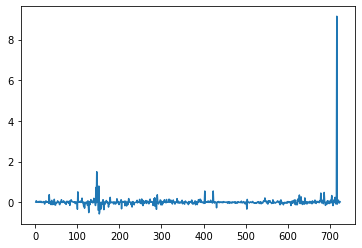

In [112]:
gme_df['retorno'].plot()

In [113]:
amazon_df.fillna(-1000,inplace=True)
gme_df.fillna(-1000,inplace=True)
kodak_df.fillna(-1000,inplace=True)
facebook_df.fillna(-1000,inplace=True)

In [114]:
gme_np = gme_df.to_numpy() 
kodak_np = kodak_df.to_numpy()
facebook_np = facebook_df.to_numpy()
amazon_np = amazon_df.to_numpy()

In [115]:
news_stock_np = np.array([gme_np,kodak_np,amazon_np,facebook_np])

/var/folders/g9/dk8kk1tn5ys_km_c5w3rh3380000gp/T/ipykernel_88259/2229301694.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  news_stock_np = np.array([gme_np,kodak_np,amazon_np,facebook_np])


In [18]:
#reddit_day.fillna(-1000,inplace=True)
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [116]:
news_stock_np.shape

(4,)

In [117]:
news_stock_np_pad = pad_sequences(news_stock_np,value=-1000, dtype='float32') # int32 by default
news_stock_np_pad

array([[[-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
         -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
        [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
         -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
        [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
         -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
        ...,
        [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
          1.7885001e+02,  1.4130000e+06, -3.7457574e-02],
        [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
          1.8036000e+02,  1.3129000e+06,  8.4428005e-03],
        [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
          1.8394000e+02,  1.2554000e+06,  1.9849196e-02]],

       [[-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
         -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
        [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
         -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
        [-1.0000000e+03, 

In [118]:
news_stock_np_pad.shape

(4, 862, 11)

In [119]:
x=news_stock_np_pad[:,:-1,:]
x.shape

(4, 861, 11)

In [121]:
y=news_stock_np_pad[:,-1,-1]
y.shape

(4,)

In [123]:
y_train =y[0:3]
y_test = y[-1:]

In [124]:
x_train = x[0:3,:,:]
x_test = x[-1:,:,:]

In [122]:
y

array([0.0198492 , 0.00137552, 0.0118087 , 1.225369  ], dtype=float32)

In [125]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers.experimental.preprocessing import Normalization
def init_model():
    #normalizar o x train
    normalizer = Normalization()
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000.))
    normalizer.adapt(x_train)
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(10, activation='linear'))
    
  #  model.compile(loss='mse', 
  #                optimizer='rmsprop', 
  #                metrics=['mae'])
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mae'])
    
    return model

#init_model().summary()

In [126]:
model=init_model()

In [128]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1/1 [==============================] - 17s 17s/step - loss: 0.0490 - mae: 0.2010
Epoch 2/2
1/1 [==============================] - 3s 3s/step - loss: 0.0400 - mae: 0.1814


In [129]:
model.predict(x_test)

array([[-0.21531583, -0.20460144, -0.14961492, -0.12190446, -0.16178705,
        -0.23984586, -0.003246  , -0.12953116,  0.07174834,  0.14797187]],
      dtype=float32)

In [130]:
#gme_np,kodak_np,amazon_np,facebook_np
y_test

array([1.225369], dtype=float32)

<AxesSubplot:>

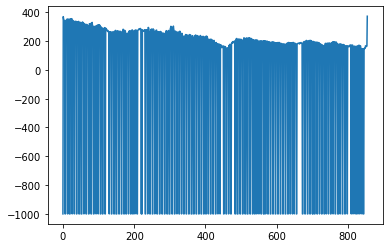